# Y-DATA PS4DS Homework 6
#### December 4, 2024

In [55]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [56]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

In this assignment, we will practice working with a real-world dataset.
We'll use the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database), which contains various health-related data for 768 Pima Indian women.

In [57]:
df = pd.read_csv('diabetes.csv')
df.rename(columns={'Outcome': 'Diabetes'}, inplace=True)  # We won't use diabetes as an outcome in this assignment.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1 - Descriptive Statistics

1. Describe each column in the dataset in terms of its marginal distribution. Check for any outliers or missing values. Then include measures of central tendency and dispersion, and add a relevant plot for each. Interpret the results.


NOTE: Pay attention to values that are equal to zero. Do they make sense in the context of the dataset? If not, consider them as missing values. Remove columns with more than 200 missing values from the dataset. After that, remove all rows with any missing values. (This is sometimes a bad idea and missing values often should be handled more delicately, but we'll do it for simplicity in this assignment.)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.shape

(768, 9)

In [60]:
zero_count = (df == 0).sum()
zero_count.sort_values(ascending=False)


Diabetes                    500
Insulin                     374
SkinThickness               227
Pregnancies                 111
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [61]:
df1 = df.drop(columns=['Insulin', 'SkinThickness'])

print(df1.columns)

#Removing rows with zeros, except Pregnancies, Diabetes since it is a categorical variable
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_filtered = df.loc[~(df[columns_to_check] == 0).any(axis=1)]
df_filtered

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [62]:
#calculate % of outliers
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers = df_filtered.select_dtypes(include=['int64', 'float64']).apply(detect_outliers)
(outliers.sum() / len(df_filtered) * 100).sort_values(ascending=False)


Insulin                     6.377551
Age                         3.316327
DiabetesPedigreeFunction    3.061224
Pregnancies                 2.806122
BloodPressure               1.785714
BMI                         1.530612
SkinThickness               0.255102
Glucose                     0.000000
Diabetes                    0.000000
dtype: float64

In [63]:
central_tendency = df_filtered.describe().loc[['mean', 'std', ]]
central_tendency.loc['variance'] = central_tendency.loc['std'] ** 2

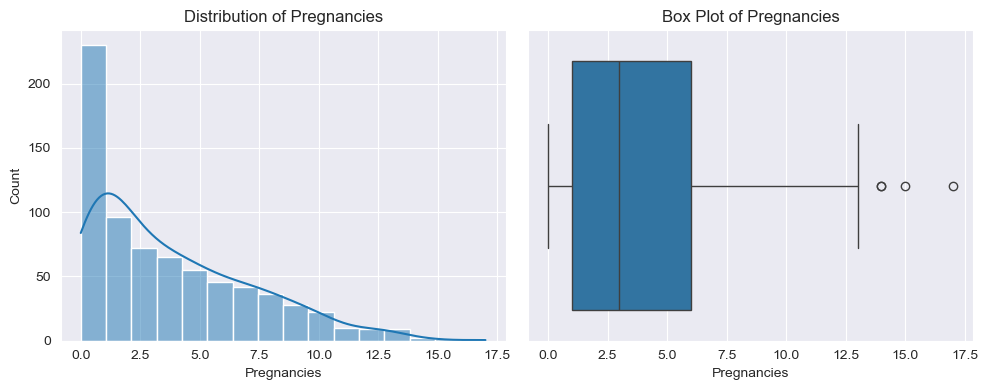

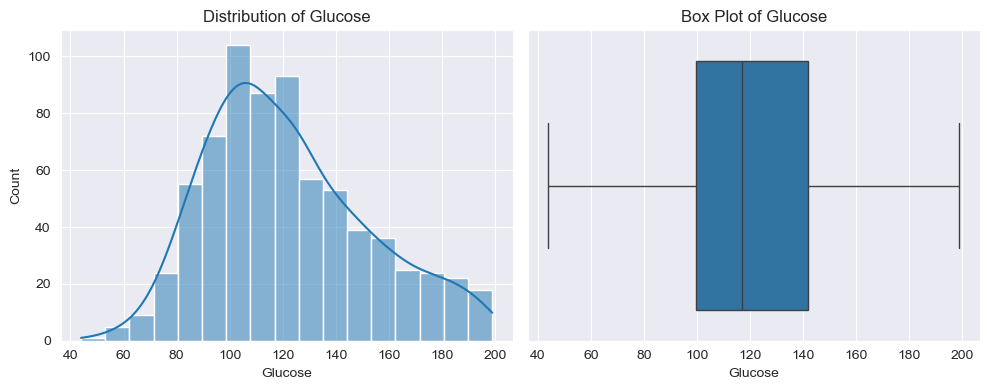

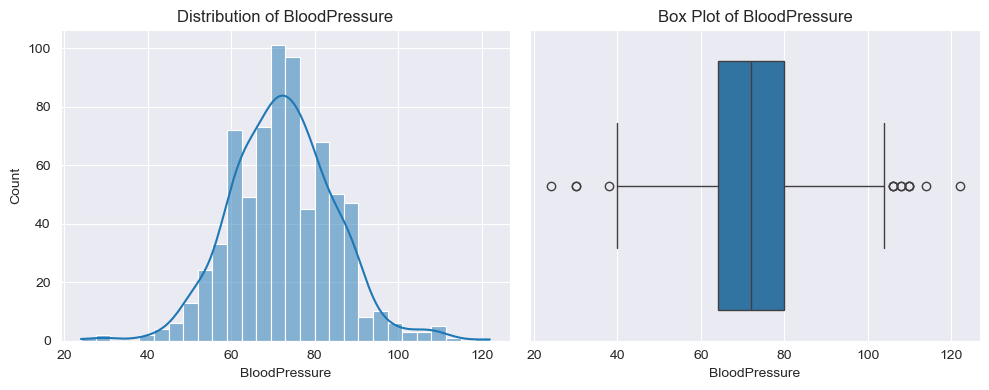

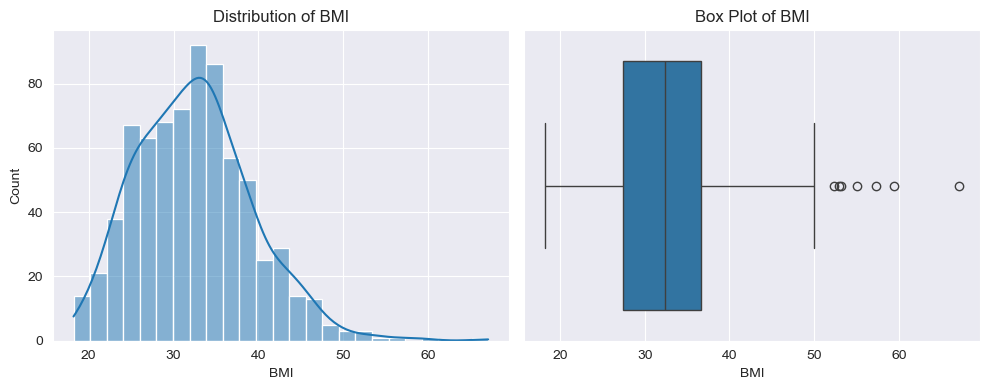

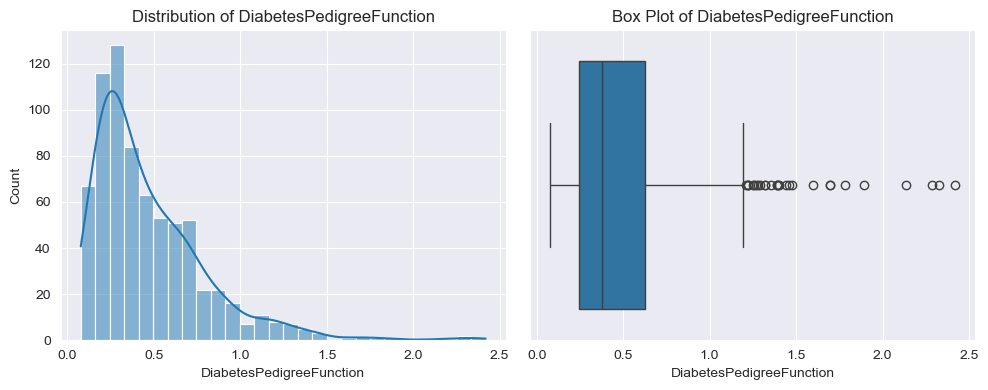

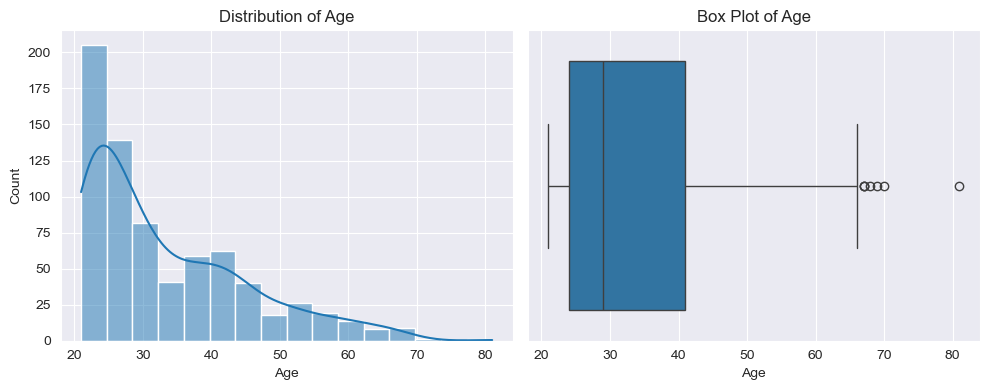

In [64]:
# Function to create distribution plot
def plot_distribution(data, column):
    plt.figure(figsize=(10, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    return plt

for column in df_clean.columns:
    if column in ['Outcome']:
        continue
    if df_clean[column].dtype in ['int64', 'float64']:
        plot_distribution(df_clean, column)
        plt.show()


Conclusions:
Outliers: Outliers are evident across variables like pregnancies, blood pressure, BMI, and diabetes pedigree function.
Key Trends:
The majority of participants have low pregnancies, normal glucose levels, and average blood pressure.
There is a young demographic skew, with fewer individuals in older age brackets.
The outcome shows a prevalence of individuals without diabetes.

In [69]:
df_filtered.info()




<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Diabetes                  392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


2. Describe the joint distribution of each pair of columns in the dataset, and include a relevant plot for each pair. For pairs of continuous variables, compute the Pearson correlation. For pairs including the `Diabetes` column, compute the observed difference in means of the other column between diabetic and non-diabetic individuals. Interpret the results.





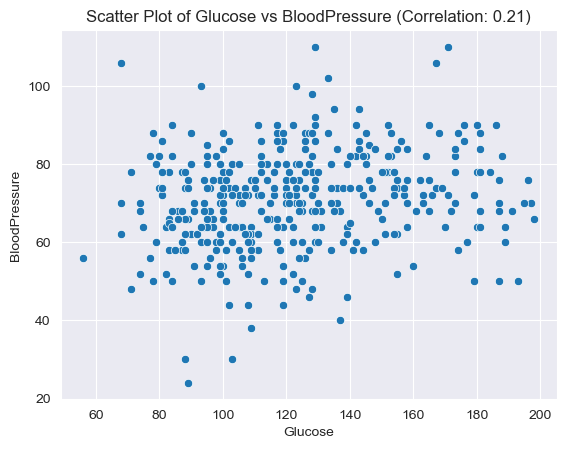

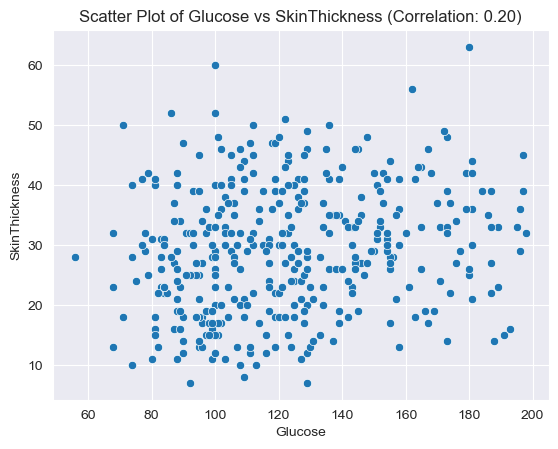

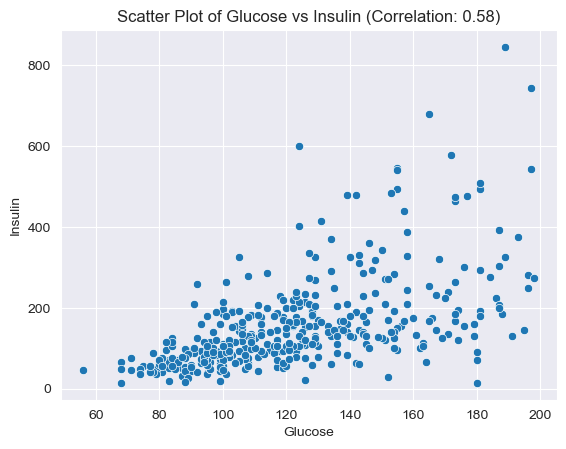

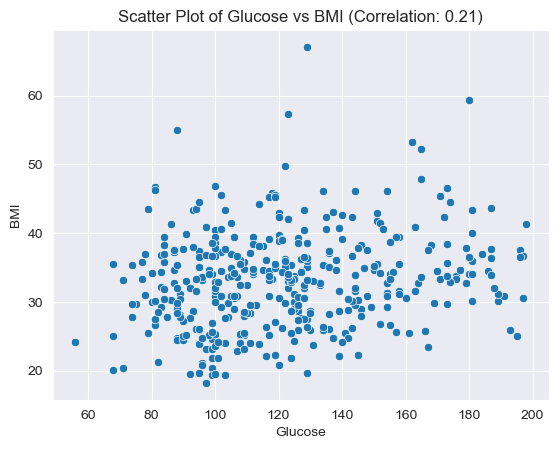

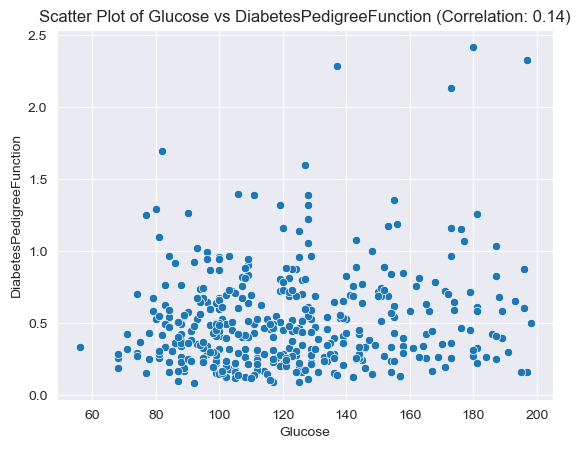

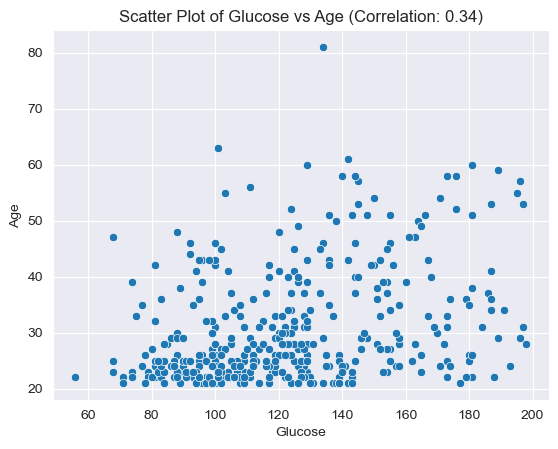

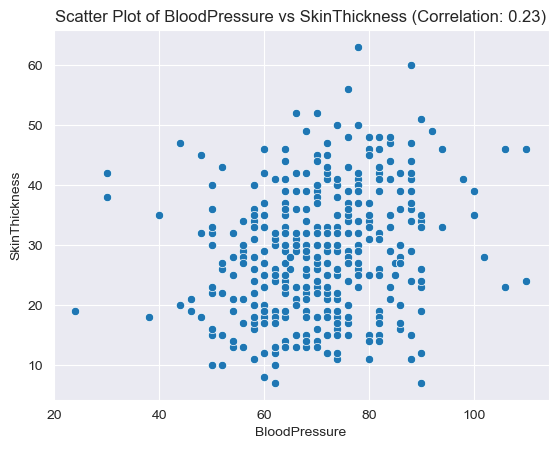

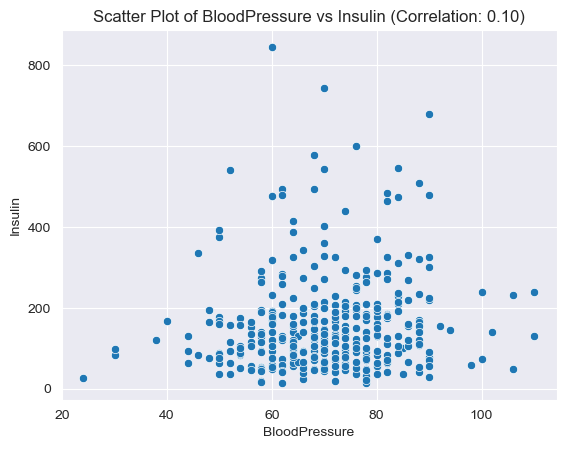

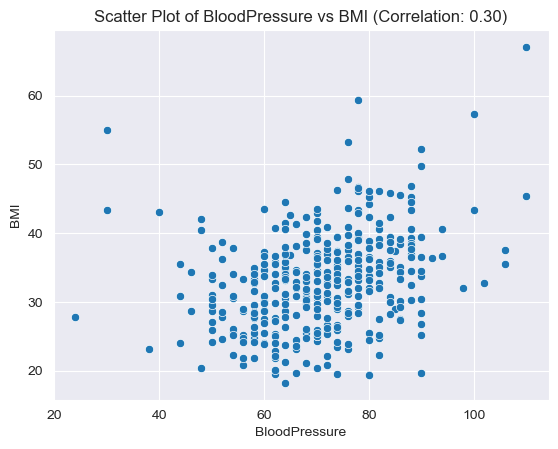

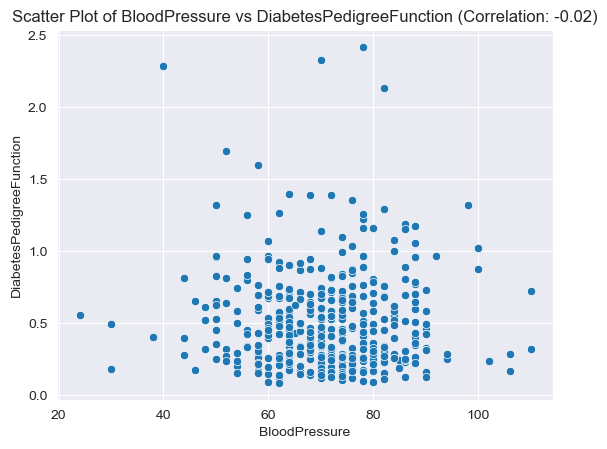

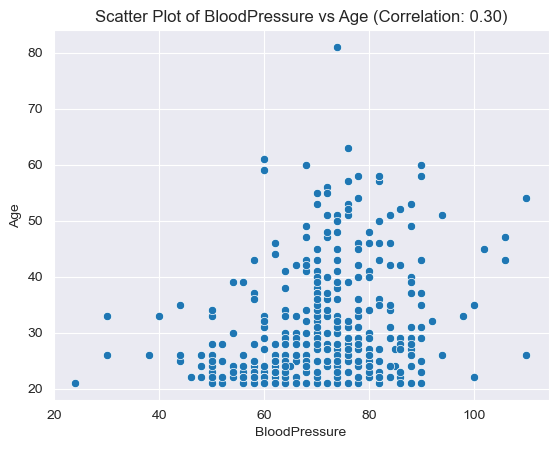

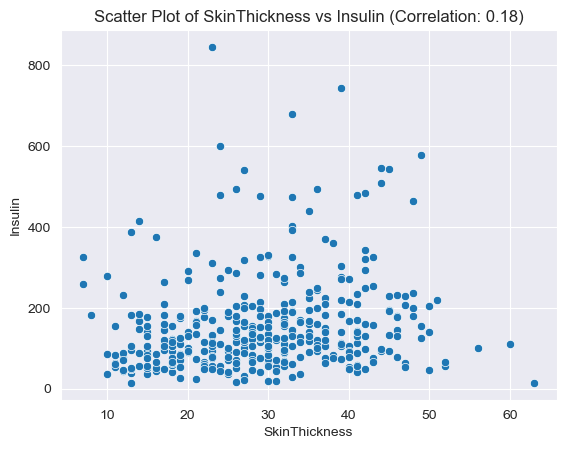

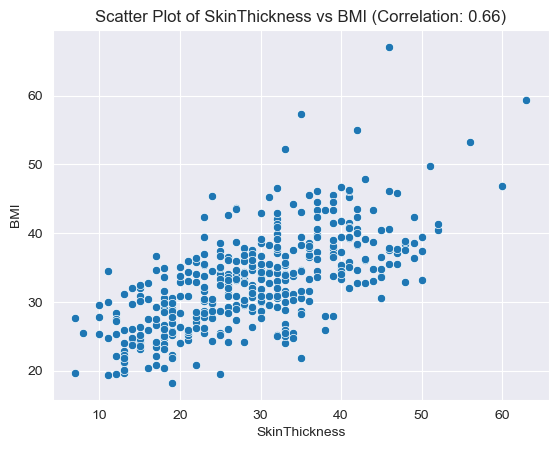

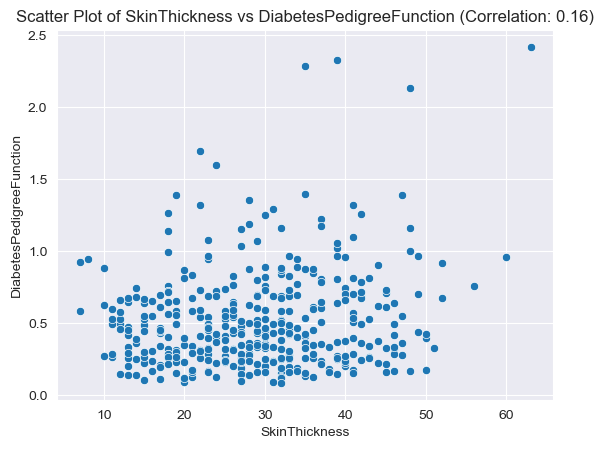

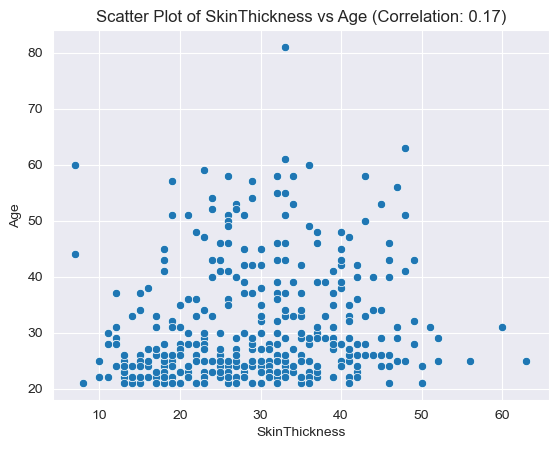

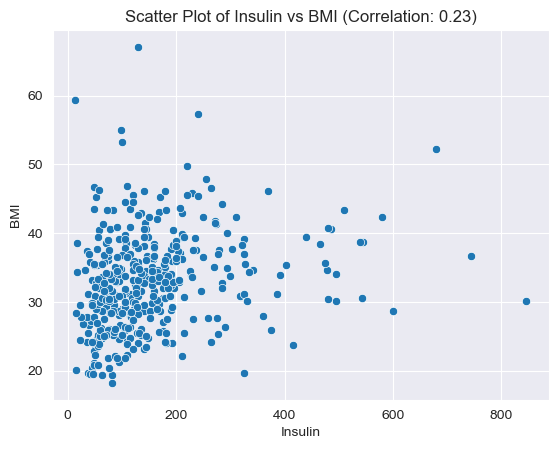

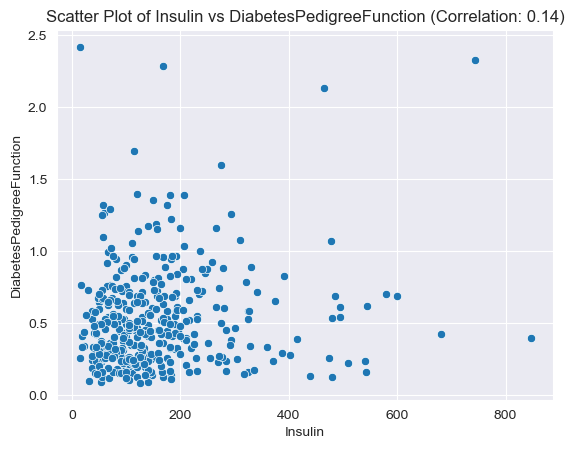

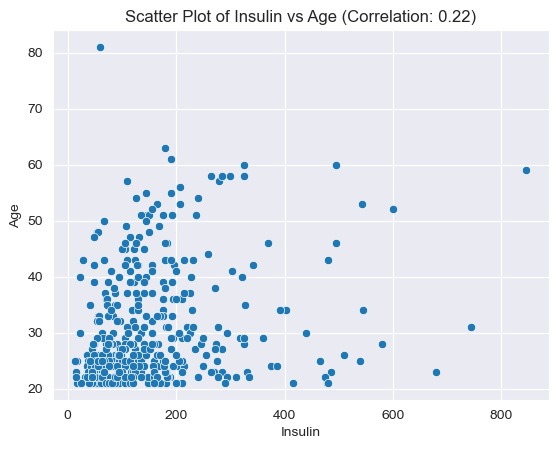

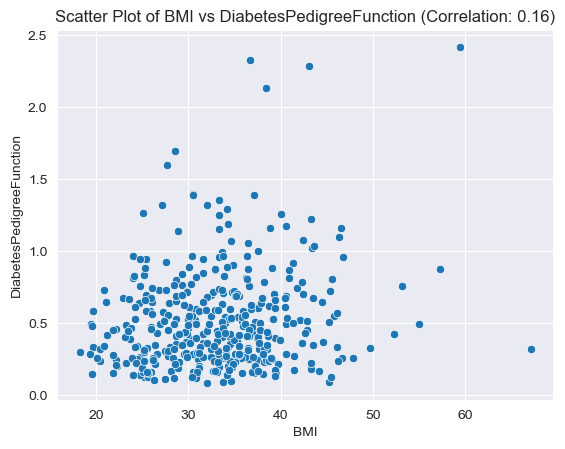

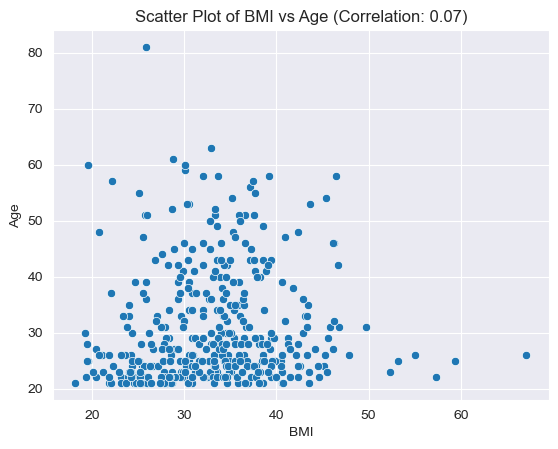

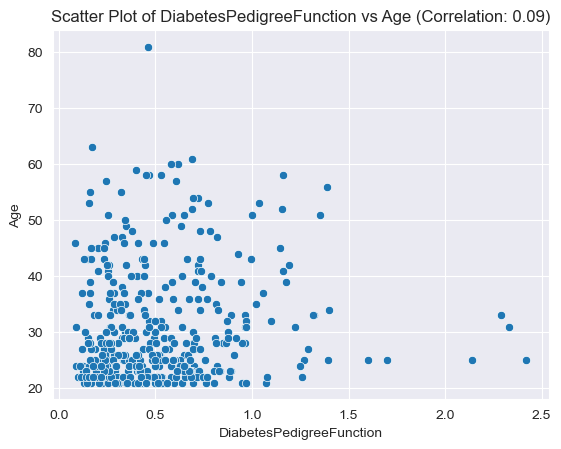

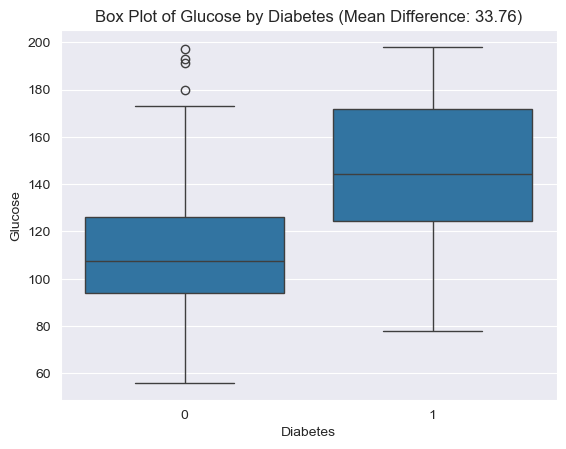

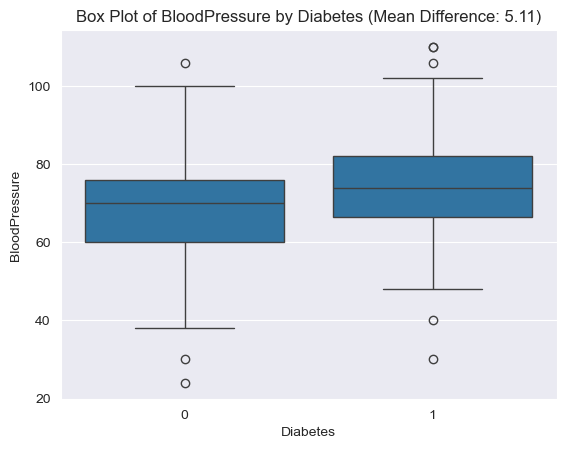

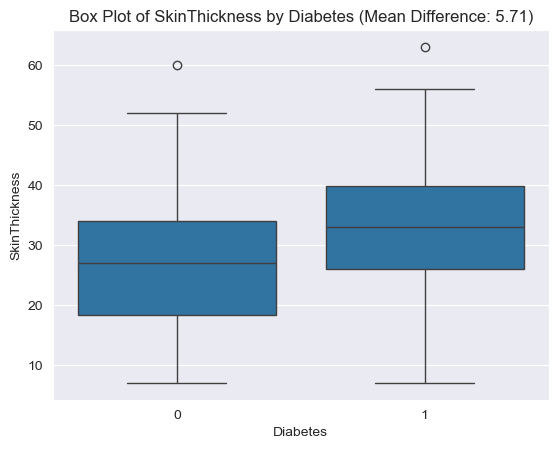

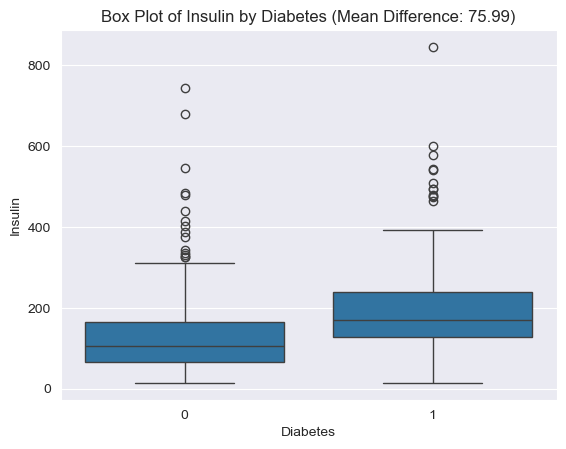

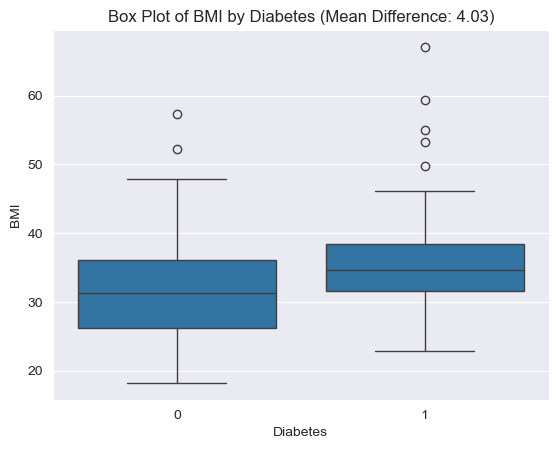

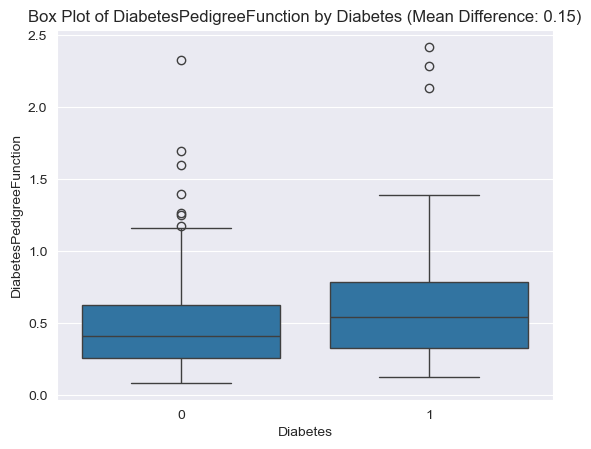

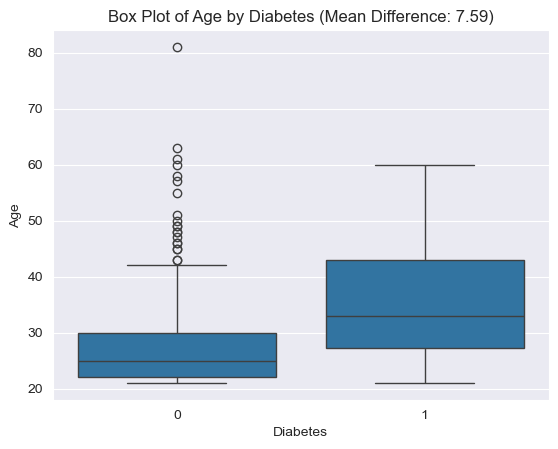

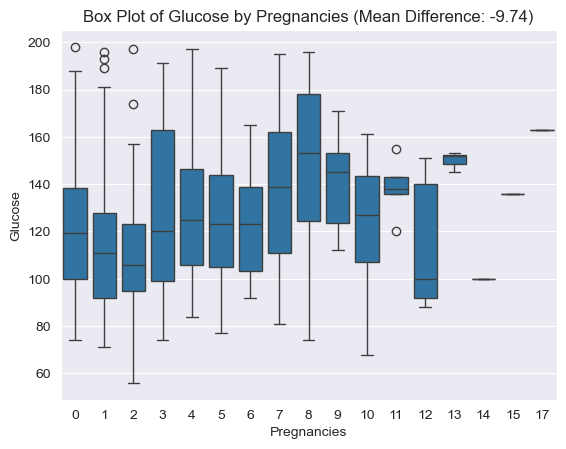

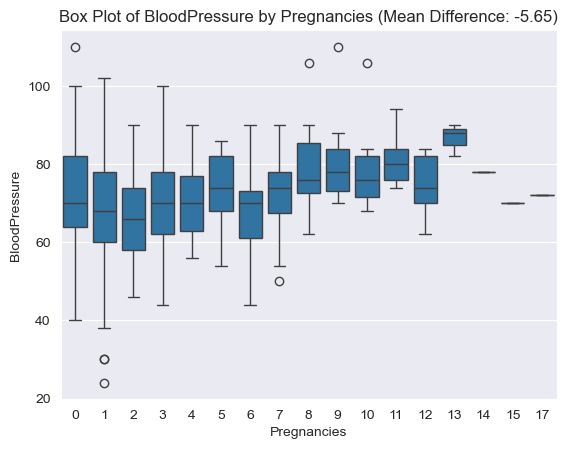

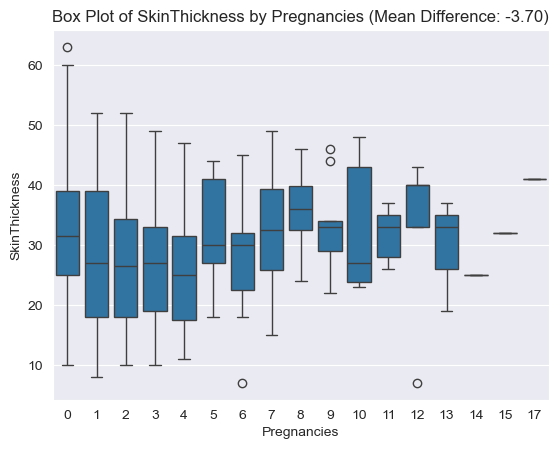

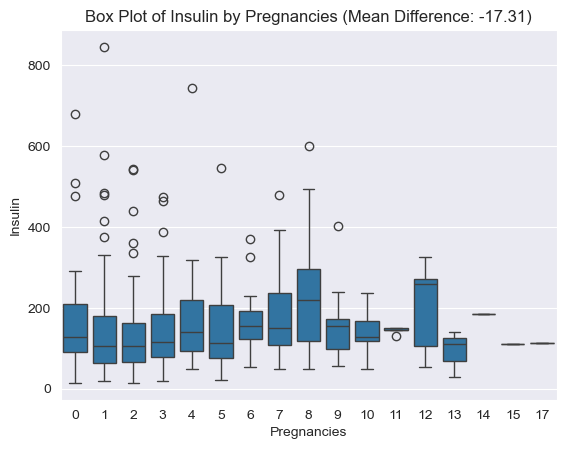

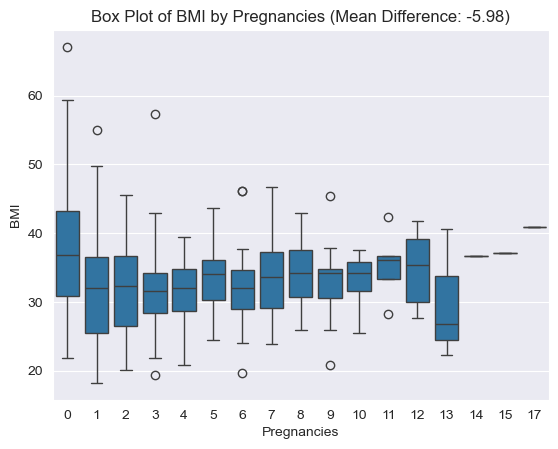

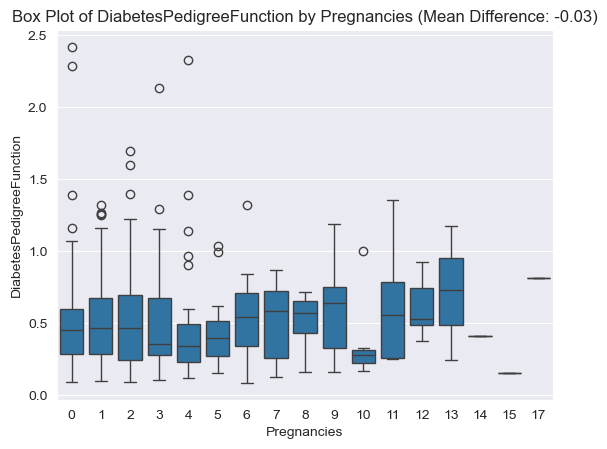

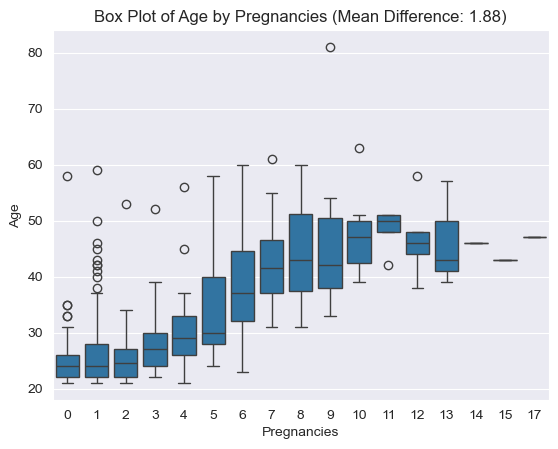

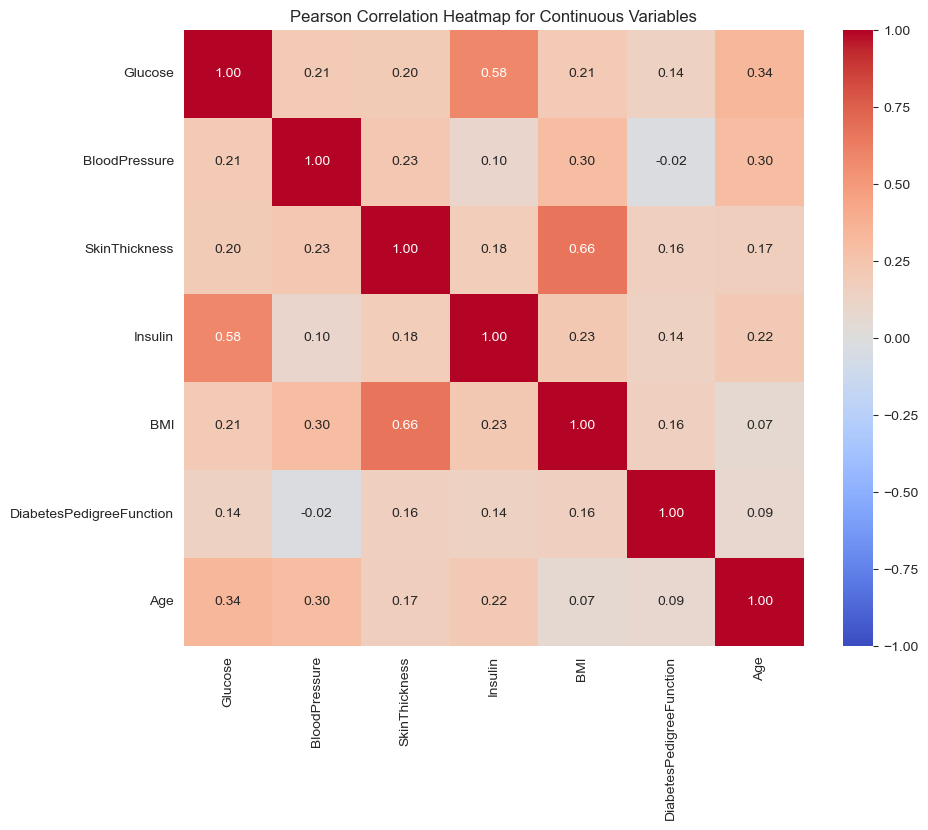

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("diabetes_cleaned.csv")

# Identify numeric and categorical columns
continuous_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_columns = ['Diabetes', 'Pregnancies']


correlation_matrix = data[continuous_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap for Continuous Variables")
plt.show()


# Function to handle analysis with "Pregnancies" as a categorical variable
def analyze_with_discrete_variable(data, continuous_columns, categorical_columns):
    results = []

    # Continuous-continuous pairwise analysis
    for i, col1 in enumerate(continuous_columns):
        for col2 in continuous_columns[i + 1:]:
            correlation = data[col1].corr(data[col2])
            results.append({'Variable1': col1, 'Variable2': col2, 'Correlation': correlation})
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f'Scatter Plot of {col1} vs {col2} (Correlation: {correlation:.2f})')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

    # Categorical-continuous pairwise analysis
    for cat_col in categorical_columns:
        for cont_col in continuous_columns:
            if cat_col != cont_col:
                means = data.groupby(cat_col)[cont_col].mean()
                if 1 in means.index and 0 in means.index:
                    mean_diff = means[1] - means[0]
                else:
                    mean_diff = np.nan  # Handle cases with missing categories
                results.append({'Variable1': cat_col, 'Variable2': cont_col, 'MeanDifference': mean_diff})
                sns.boxplot(x=data[cat_col], y=data[cont_col])
                plt.title(f'Box Plot of {cont_col} by {cat_col} (Mean Difference: {mean_diff:.2f})')
                plt.xlabel(cat_col)
                plt.ylabel(cont_col)
                plt.show()

    return pd.DataFrame(results)

# Perform the analysis
results_df = analyze_with_discrete_variable(data, continuous_columns, categorical_columns)



In [5]:
# Your code here

## Question 2 - Hypothesis Testing

We now dive deeper into the difference between diabetic and non-diabetic individuals in the dataset.

1. For each column apart from `Diabetes`, test for equality of means between diabetic and non-diabetic patients at a significance level of 0.05. Report the results of each test, including the p-value and whether the null hypothesis is rejected.

2. Use Pearson's chi-squared test to test for independence between the `Diabetes` and `Pregnancies` columns. Report the p-value and whether the null hypothesis is rejected at a significance level of 0.05. What is the interpretation of this result? Compare this with the result of the previous question.


In [7]:
# Your code here

3. (Theory) Since we have performed several hypothesis tests, consider the following question: if you conduct three hypothesis tests at significance level $\alpha$ and the null hypotheses for all of them are true, what is the probability that at least one of the tests will reject its null hypothesis? Give an upper bound for this probability in the following way:
    * Denote $H_0^{(i)}$ as the null hypothesis for the $i$-th test, and $A_i$ as the event that the $i$-th test returns "reject". Write mathematically what it means for the $i$-th test to have a significance level of $\alpha$.
    * Define the event that at least one of the tests returns "reject" given that all null hypotheses are true, and find an upper bound for its probability by using the union bound: for any events $E_1, E_2, E_3$ it holds that $P(E_1 \cup E_2 \cup E_3) \leq P(E_1) + P(E_2) + P(E_3)$.

\# Your answer here

SIDE NOTE: this question relates to the important problem of [multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem).
The bound shown here suggests one general way of addressing this problem, called the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction), changing the significance level of each test to be $\alpha/m$ where $m$ is the number of tests performed.
In practice, this is often overly conservative and other methods are used.

## Question 3 - Confidence Intervals via Bootstrapping

We now focus on the difference in glucose levels between diabetic and non-diabetic individuals in the dataset. Our goal is to quantify this difference as well as our uncertainty about it in a different way than in Question 2.

1. Using the bootstrap method, compute a 95% confidence interval for the difference in mean glucose levels between diabetic and non-diabetic individuals.
2. How does the resulting interval compare to the results of the relevant hypothesis test in Question 2? Explain using the connection between confidence intervals and hypothesis tests.

In [8]:
# Your code here

## Question 4 - Linear Regression

Our final goal is to incorporate additional features into the analysis of glucose levels. We will do so by fitting a linear regression model.

1. Fit a linear regression model for glucose levels using the following features: `Diabetes`, `BloodPressure`, `Age`, and `BMI`. Interpret the results of the model.
2. Use the model summary to give a point estimate and a confidence interval for the difference in mean glucose levels between diabetic and non-diabetic individuals. Compare this to the results of the previous questions. HINT: consider the interpretation of the model coefficient for `Diabetes`.
3. Based on your answers in Question 1.2, do you expect issues with multicollinearity in this model?
4. For each row in the dataset, compute the predicted value and the residual. Plot the residuals against the predicted values. What do you observe?
5. Plot the residuals as a function of each feature. What do you observe?
6. Suggest improvements to the model and the analysis.

In [9]:
# Your code here